In [0]:
import numpy as np
#os hago el trabajo más duro

# xD

# Introducción 

La idea de la práctica es visitar aquellos temas que en cierta manera nos permitan ver más contenido del curso.

La práctica esta dividida en 4 o 5 subapartados, que ya tenéis en este mismo Notebook. Estos subapartados estan aquí para que rellenéis el código que hace falta para la realización de la práctica. Obviamente podéis usar tantas celdas como os hagan falta, es más es de agradecer si el código final esta algo "limpio". Usar funciones, algo de comentario, etc, etc...

Usaremos 2 datasets, uno para el primer ejercicio, y otro para el resto de ejercicios.

Ejercicios:


1.   Machine Learning vs Deep Learning (Acordaros que hay que implementar el pipeline visto en clase entero)

    1.1. Implementación de un modelo de Sentiment Analysis con algún algoritmo de Machine Learning Clásico.
    
    1.2. Implementación de un modelo de Sentiment Analysis con alguna arquitectura de Deep Learning.
    
    1.3. Breve Comparación de resultados. Confusion Matrix.
    
2. Hacer Analysis de los tweets del segundo dataset. Que temas aparecen? Como se representan estos temas? De que hablan unos y otros?

3. Escoged a uno de los dos presidentes, y escribid tweets como ellos, usando un Modelo Generativo.

En cada ejercicio, espero explicaciones y razonamientos del porque una arquitectura y no otra, por ejemplo en Deep Learning, porque usar Convolutionals en lugar de recurrentes, o en Machine Learning, Bayes en lugar de SVM. Hay que explicar el pipeline, sobretodo el preproceso de datos, con lo que habrá que hacer un pequeño estudio de que datos tenemos, y si hay cosas que se pueden ignorar, si hacéis stemming, o no, etc, etc...

Acordaros de que objetivo final no es que obtengáis una accuracy brutal, es que comprendais que pasa cuando usais un algoritmo u otro, y que problemas o beneficios nos dan.

![](https://i.pinimg.com/736x/19/63/8c/19638c0b33e2f7822d6806ce31d89d84--funny-cartoons-funny-jokes.jpg =400x)

Mucha suerte y ánimo!



# Dataset

Breve explicación del dataset

In [3]:
from google.colab import files
import io

# cargar

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


# pandas
import pandas as pd


Saving train_sentiment_utf8.csv to train_sentiment_utf8.csv
User uploaded file "train_sentiment_utf8.csv" with length 8677569 bytes


In [4]:
df = pd.read_csv(io.StringIO(uploaded['train_sentiment_utf8.csv'].decode('utf-8')))
df.head(5)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


En primer lugar vamos a examinar el dataset. Consta de 3 columnas, la primera de ellas es un id, la segunda es un tag de sentimiento que puede ser 1 o 0 (binario) y la tercera es el texto con el que vamos a entrenar la red para el ejercicio.

Como tenemos etiquetas, nos encontramos ante un problema de supervised learning. En este caso queremos analizar el sentimiento.

Como parte del preproceso de los datos vamos a dividir el dataset en train y set utiizando la funcion de sci-kit learn.

Ademas vamos a eliminar los espacios que aparecen al principio, para homogeneizar un poco los mensajes. Dejo mayusculas y minusculas porque entiendo que son parte del sentimiento y merece la pena tenerlas en cuenta al entrenar.

In [5]:
df = pd.DataFrame(
  {
      'SentimentText': df['SentimentText'].map(lambda x: x.lstrip()),
      'Sentiment': df['Sentiment']
  }
)

df = df[['SentimentText', 'Sentiment']]

dfM = df.as_matrix()

dfM

array([['is so sad for my APL friend.............', 0],
       ['I missed the New Moon trailer...', 0],
       ['omg its already 7:30 :O', 1],
       ...,
       ['@CuPcAkE_2120 ya i thought so ', 0],
       ["@Cupcake_Dollie Yes. Yes. I'm glad you had more fun with me. ",
        1],
       ['@cupcake_kayla haha yes you do ', 1]], dtype=object)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(dfM, test_size=.3, random_state = 0)

print('Datos train: ', X_train.shape)
print('Datos test:  ', X_test.shape)


Datos train:  (69992, 2)
Datos test:   (29997, 2)


# Práctica/Código a entregar

## Pre-train Sentiment Analysis Model

En primer lugar enfocamos el problema con machine learning. 

- Voy a afrontarlo con Bayes por su sencillez. Determinamos la probabilidad de que una entrada pertenezca a una clase según la probabilidad de pertenencia a esa clase de las palabras que la conforman. Probaremos para ello la implementación manual que vimos en clase, sin necesidad de definir un pipeline. El mayor problema de este modelo es que utiliza "bolsas de palabras" por lo que no se tendrá en cuenta el orden de las palabras pero entiendo que en este problema de clasificación del sentimiento no es tan determinante.



1.1. BAYES (implementación manual)





In [0]:
def predict(model, data, alpha=0.00000001):
    likelihood, prior = model
    classes = list(prior.keys())
    print(classes)
    # matriz de predicciones
    predicted = np.zeros((len(data),len(classes)))
    for i, doc in enumerate(data):
        doc_rep = doc.split(" ")
        probs = np.zeros((len(classes)))
        for j, label in enumerate(classes):
            pwc =[log(likelihood[label][x]) if x in likelihood[label] else log(alpha) for x in doc_rep] 
            #sumar en log es igual a multiplicar normal.
            pwc = np.array(pwc)
            prob = np.sum(pwc)
            probs[j] = prob+log(prior[label])
        predicted[i,:] = softmax(probs)
    return np.round(predicted, 2)

In [0]:
xs = [x for x , _ in X_train]

In [0]:
from math import log2, log, exp

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference

def prepare_data(data):
    data_together = {}
    for x, y in data:
        if y in data_together:
            data_together[y].append(x)
        else: 
            data_together[y]=[x]
    return data_together
    

from collections import Counter
def get_prior(data):
    prior = Counter([y for _, y in data])
    p = {}
    for pr in prior.keys():
        p[pr]=prior[pr]/len(data)
    return p
    

def get_likelihood(data):
    tokens_in_class = {}
    d = prepare_data(data)
    #cuantas veces w aparece en cada clase
    for label, strings in d.items():
        tokens_in_class[label] = Counter([token for string in strings for token in string.split(" ")])
        print(tokens_in_class[label].most_common(5))
    
    # cuantos tokens por clase
    tokens_per_class = {}
    for label in tokens_in_class.keys():
        tokens_per_class[label] = sum(tokens_in_class[label].values())
    print(tokens_per_class)
    
    likelihood = {}
    for label in tokens_in_class.keys():
        likelihood[label] = {}
        for token in tokens_in_class[label].keys():
            likelihood[label][token] = tokens_in_class[label][token]/tokens_per_class[label]
    return likelihood
    
def train(data):
    likelihood = get_likelihood(data)
    prior = get_prior(data)    
    return likelihood, prior

In [21]:

model = train(X_train)
predictions = predict(model, xs)
i=0
for datap, p in zip(X_train, predictions):
  i+=1
  if i < 11:
    print(datap, p)

[('', 34471), ('I', 12234), ('to', 9900), ('the', 8409), ('i', 6741)]
[('', 47929), ('the', 11276), ('I', 10750), ('to', 10328), ('you', 9814)]
{0: 456372, 1: 557753}
[0, 1]
['@BloodiMari Yeah, they suck balls ' 0] [1. 0.]
['@angelandz My favorite part of Muppet Babies was the Mom. You only ever saw her legs '
 1] [0. 1.]
[". @wickedblueglow he's in bed sick. Heavy fever. Went to dr's. Part of the reason i'm watching Aladdin 2 now and still haven't been fed "
 0] [1. 0.]
["@alwayscoffee Sweet! I wish I could poetry like you, you're so prolific. I just can't do poetry. I hardly understand it half the time. "
 0] [1. 0.]
['lonely, drinking crane lake' 0] [1. 0.]
['@amandapalmer will WKAP book be on sale at your ed fringe show? My mum wont preorder me it   (amandapalmer live &gt; http://ustre.am/1qRf)'
 0] [1. 0.]
["they didn't do the song I wanted. :| LOL still amaaaaazing &lt;3" 0] [1. 0.]
['#smx no free wifi apparently  thats baaaaad #smxlondon' 0] [1. 0.]
['my friends can get with ur 

In [22]:
test = [x for x , _ in X_test]
predictions = predict(model, test)
i=0
for datap, p in zip(X_test, predictions):
  i+=1
  if i < 11:
    print(datap, p)

[0, 1]
['@Benno4321 working balls ' 0] [0.7 0.3]
['@asherroth same her lol ' 1] [0.5 0.5]
['@AshleySemila 70+ pairs of kicks. Dunks, air max, jordans even some adidas and of course BLAZERS! I KNO U KNO ABT BLAZERS.  Owwww'
 1] [1. 0.]
['@brenda_song HI Brenda! How are you? I start exams tomorow.  btw ur Amazing! Love ya!  Xxxxx'
 0] [0. 1.]
['.@moryan Thx for all the Supernatural coverage - its the only genre show gaining viewers... Props    http://www.airlockalpha.com/node/6437'
 1] [0. 1.]
['@aisfornala Oh. So people laugh at me huh?  Your words are like an ice dagger to my heart etc etc ;)'
 0] [0.16 0.84]
['@amieewhitney for sureeee..course i will babes.. on here or msn or what!? lol   congrats, 4 kids! Oo whao.'
 1] [0.41 0.59]
['...going back to sleep...  blah' 0] [0.85 0.15]
['@CMoz Thats a relief ..........40 mins to go........till Monday evening.....  D'
 1] [0. 1.]
['@candyann ' 0] [0.4 0.6]


En segundo lugar vamos a resolver el mismo problema de analisis de sentimiento con Deep Learning. 

- En esta ocasión vamos a usar una red convolucional o CNN con una capa de embeddings tal y como vimos en clase. Me quedo con una CNN porque entiendo por la comparativa que vimos que una red recurrente no va a suponer un salto importante respecto a la convolucional y dado el tiempo del que dispongo para la pracrtica y las limitaciones del google colab prefiero quedarme con las arquitecturas mas sencillas posibles.

1.2. CNN 

In [6]:
from collections import Counter

from keras.layers import MaxPooling1D, GlobalMaxPooling1D
from keras.layers import Input, Embedding, Concatenate, Flatten
from keras.models import Model
from keras.layers import Conv1D, Conv2D, SimpleRNN, LSTM, Dense, Dropout

Using TensorFlow backend.


In [2]:
!pip install spacy
!python -m spacy download en_core_web_sm

    100% |████████████████████████████████| 17.6MB 2.0MB/s 
    100% |████████████████████████████████| 92kB 17.5MB/s 
    100% |████████████████████████████████| 1.2MB 13.4MB/s 
    100% |████████████████████████████████| 51kB 17.9MB/s 
    100% |████████████████████████████████| 194kB 18.5MB/s 
    100% |████████████████████████████████| 153kB 18.5MB/s 
    100% |████████████████████████████████| 604kB 15.8MB/s 
    100% |████████████████████████████████| 51kB 17.0MB/s 
    100% |████████████████████████████████| 389kB 17.6MB/s 
    100% |████████████████████████████████| 143kB 21.9MB/s 
  Running setup.py bdist_wheel for spacy ... - \ | / -

 \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /content/.cache/pip/wheels/fb/00/28/75c85d5135e7d9a100639137d1847d41e914ed16c962d467e4
  Running setup.py bdist_wheel for murmurhash ... - \ | / done
  Stored in directory: /content/.cache/pip/wheels/b8/94/a4/f69f8664cdc1098603df44771b7fec5fd1b3d8364cdd83f512
  Running setup.py bdist_wheel for cymem ... - \ done
  Stored in directory: /content/.cache/pip/wheels/55/8d/4a/f6328252aa2aaec0b1cb906fd96a1566d77f0f67701071ad13
  Running setup.py bdist_wheel for preshed ... - \ | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/8f/85/06/2d132fb649a6bbcab22487e4147880a55b0dd0f4b18fdfd6b5
  Running setup.py bdist_wheel for thin

 / - \ | / done
  Stored in directory: /content/.cache/pip/wheels/f8/b1/86/c92e4d36b690208fff8471711b85eaa6bc6d19860a86199a09
  Running setup.py bdist_wheel for msgpack-python ... - \ | / done
  Stored in directory: /content/.cache/pip/wheels/d5/de/86/7fa56fda12511be47ea0808f3502bc879df4e63ab168ec0406
Successfully built spacy murmurhash cymem preshed thinc pathlib ujson dill regex wrapt cytoolz msgpack-python
    100% |████████████████████████████████| 37.4MB 52.3MB/s 
  Running setup.py install for en-core-web-sm ... - \ | done

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_sm

    You can now load the model via spacy.load('en_core_web_sm')



In [0]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'tagger', 'ner', 'textcat'])

In [0]:
dataset = []
for row in df.iterrows():
    ix, data = row
    dataset.append((data[0], data[1]))

In [10]:
tokens = []
tokenized = []
for x, y in dataset:
    x_t = nlp(x)
    toks = [t.text for t in x_t]
    tokens+= toks
    tokenized.append((toks, y))
    
vocab_counter = Counter(tokens)
vocab = set(tokens)
print('Num de features a usar: ', len(vocab))  
print(len(tokenized))   

Num de features a usar:  130913
99989


In [11]:
maxlen = max([len(x) for x, _ in tokenized])
maxlen

185

In [12]:
lens = [len(x) for x, _ in tokenized]
median = np.median(np.array(lens))
mean = np.mean(np.array(lens))
maxlen = int(median)*2
print(median, mean, maxlen)

16.0 16.660972706997768 32


In [13]:
tokenized_filtered = [(x, y) for x, y in tokenized if len(x) < maxlen]
len(tokenized_filtered)

95239

Word to ID -> convertimos el vocabulario en enteros

In [0]:
w2id = {k:i for i, k in enumerate(vocab)}
w2id['<UNK>'] = len(w2id)

In [0]:
labels = ['ko',
            'ok']

In [0]:
l2id = {label:i for i, label in enumerate(labels)}

In [0]:
input_ready = []
for x, y in tokenized_filtered:
    sentence = np.zeros((maxlen))
    label = np.zeros((len(labels)))
    label[int(y)-1] = 1
    for i, t in enumerate(x):
        sentence[i] = w2id[t] if t in vocab_counter and vocab_counter[t]>=5 else w2id['<UNK>']
    input_ready.append((sentence,label))

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

def split_train_val_test(dataset, split=0.2):

    x, y = zip(*dataset)
    x = np.array(list(x))
    y = np.array(list(y))
    sss = StratifiedShuffleSplit(n_splits=1, test_size=split, random_state=1337) #l33t seed
    for train_index, test_index in sss.split(x, y):
        x_train, x_val = x[train_index], x[test_index]
        y_train, y_val = y[train_index], y[test_index]
    splits = {'train':(x_train, y_train), 'test':(x_val, y_val)}
    return splits

splits = split_train_val_test(input_ready)
print(splits['train'][0].shape)
print(splits['train'][1].shape)
splits['train'][1]

(76191, 32)
(76191, 2)


array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [19]:
embedding_dim = 100

input_layer = Input(shape=(maxlen,) )# maxlen
embedding = Embedding(output_dim=embedding_dim, input_dim=len(w2id), input_length=maxlen)(input_layer)#w2id maxlen

conv_1 = Conv1D(filters=50, kernel_size=1, strides=1, activation='relu', padding='valid')(embedding)
mp_1 = GlobalMaxPooling1D()(conv_1)

conv_2 = Conv1D(filters=50, kernel_size=2, strides=1, activation='relu', padding='valid')(embedding)
mp_2 = GlobalMaxPooling1D()(conv_2)

conv_5 = Conv1D(filters=50, kernel_size=5, strides=1, activation='relu', padding='valid')(embedding)
mp_5 = GlobalMaxPooling1D()(conv_5)

doc_representation = Concatenate()([mp_1, mp_2, mp_5])

dense_1 = Dense(100, activation='relu')(doc_representation)
drop_1 = Dropout(0.5)(dense_1)
dense_2 = Dense(100, activation='relu')(drop_1)
drop_2 = Dropout(0.5)(dense_2)
out = Dense(len(l2id), activation='softmax')(drop_2)

model = Model(inputs=input_layer, outputs=out)

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 32, 100)      13091400    input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 32, 50)       5050        embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 31, 50)       10050       embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_3 (

In [20]:
print(splits['train'][0].shape)
print(splits['train'][1].shape)
    

model.fit(splits['train'][0], splits['train'][1],
          epochs=20,
          batch_size=16)

(76191, 32)
(76191, 2)
Epoch 1/20
40144/76191 [==============>...............] - ETA: 49s - loss: 0.5460 - acc: 0.7247

76191/76191 [==============================] - 103s 1ms/step - loss: 0.5291 - acc: 0.7413
Epoch 2/20
 9424/76191 [==>...........................] - ETA: 1:27 - loss: 0.4725 - acc: 0.7871

75328/76191 [============================>.] - ETA: 1s - loss: 0.4788 - acc: 0.7856

76191/76191 [==============================] - 100s 1ms/step - loss: 0.4790 - acc: 0.7857
Epoch 3/20
25280/76191 [========>.....................] - ETA: 1:06 - loss: 0.4615 - acc: 0.8003

76191/76191 [==============================] - 100s 1ms/step - loss: 0.4664 - acc: 0.8009
Epoch 4/20
 2704/76191 [>.............................] - ETA: 1:36 - loss: 0.4237 - acc: 0.8384

76191/76191 [==============================] - 100s 1ms/step - loss: 0.4600 - acc: 0.8097


Epoch 5/20
76160/76191 [============================>.] - ETA: 0s - loss: 0.4545 - acc: 0.8169

76191/76191 [==============================] - 100s 1ms/step - loss: 0.4545 - acc: 0.8169
Epoch 6/20
25584/76191 [=========>....................] - ETA: 1:06 - loss: 0.4289 - acc: 0.8316

76191/76191 [==============================] - 100s 1ms/step - loss: 0.4452 - acc: 0.8255
Epoch 7/20
 2736/76191 [>.............................] - ETA: 1:36 - loss: 0.4309 - acc: 0.8249

62720/76191 [=======================>......] - ETA: 17s - loss: 0.4297 - acc: 0.8330

76191/76191 [==============================] - 100s 1ms/step - loss: 0.4327 - acc: 0.8317
Epoch 8/20
19664/76191 [======>.......................] - ETA: 1:14 - loss: 0.4016 - acc: 0.8472

76191/76191 [==============================] - 100s 1ms/step - loss: 0.4247 - acc: 0.8384
Epoch 9/20
   64/76191 [..............................] - ETA: 1:45 - loss: 0.4596 - acc: 0.8125

76191/76191 [==============================] - 100s 1ms/step - loss: 0.4261 - acc: 0.8435


Epoch 10/20
76176/76191 [============================>.] - ETA: 0s - loss: 0.4309 - acc: 0.8525

76191/76191 [==============================] - 100s 1ms/step - loss: 0.4309 - acc: 0.8525
Epoch 11/20
25456/76191 [=========>....................] - ETA: 1:06 - loss: 0.4111 - acc: 0.8683

76191/76191 [==============================] - 100s 1ms/step - loss: 0.4210 - acc: 0.8599
Epoch 12/20
 2752/76191 [>.............................] - ETA: 1:36 - loss: 0.4169 - acc: 0.8612

76191/76191 [==============================] - 100s 1ms/step - loss: 0.4163 - acc: 0.8671


Epoch 13/20
76160/76191 [============================>.] - ETA: 0s - loss: 0.3992 - acc: 0.8711

76191/76191 [==============================] - 100s 1ms/step - loss: 0.3992 - acc: 0.8710
Epoch 14/20
17520/76191 [=====>........................] - ETA: 1:17 - loss: 0.3729 - acc: 0.8826

76191/76191 [==============================] - 100s 1ms/step - loss: 0.4040 - acc: 0.8773


Epoch 15/20
76144/76191 [============================>.] - ETA: 0s - loss: 0.4004 - acc: 0.8832

76191/76191 [==============================] - 100s 1ms/step - loss: 0.4006 - acc: 0.8832
Epoch 16/20
25472/76191 [=========>....................] - ETA: 1:06 - loss: 0.4020 - acc: 0.8879

76191/76191 [==============================] - 100s 1ms/step - loss: 0.3996 - acc: 0.8864
Epoch 17/20
 2672/76191 [>.............................] - ETA: 1:38 - loss: 0.3408 - acc: 0.8967

74656/76191 [============================>.] - ETA: 2s - loss: 0.4208 - acc: 0.8929

76191/76191 [==============================] - 100s 1ms/step - loss: 0.4199 - acc: 0.8929
Epoch 18/20
24592/76191 [========>.....................] - ETA: 1:08 - loss: 0.3705 - acc: 0.9035

76191/76191 [==============================] - 100s 1ms/step - loss: 0.3941 - acc: 0.8975
Epoch 19/20
 2320/76191 [..............................] - ETA: 1:37 - loss: 0.3630 - acc: 0.9030

76191/76191 [==============================] - 100s 1ms/step - loss: 0.3910 - acc: 0.9034


Epoch 20/20
76144/76191 [============================>.] - ETA: 0s - loss: 0.4094 - acc: 0.9079

76191/76191 [==============================] - 99s 1ms/step - loss: 0.4096 - acc: 0.9079


In [21]:
score_cnn = model.evaluate(splits['test'][0], splits['test'][1], batch_size=16)
score_cnn

19048/19048 [==============================] - 3s 148us/step


[1.0213146162278408, 0.759134817303654]

Hemos conseguido una accuracy del 75% en 20 epocas.

## Sentiment Analysis with Politics

## Tweet Analysis

Para la segunda parte de la practica vamos a utilizar un nuevo dataset. El objetivo de este primer apartado es analizar los tweets de los que se compone el segundo dataset. Vamos a hacer un clustering (topic modelling con algoritmo LDA) para ver de que hablan estos tweets. 

In [5]:
#Code aquí
from google.colab import files
import io
import pandas as pd

uploaded2 = files.upload()

for fn in uploaded2.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded2[fn])))

Saving dataset2.json to dataset2.json
User uploaded file "dataset2.json" with length 1070528 bytes


In [6]:
df2 = pd.read_json(io.StringIO(uploaded2['dataset2.json'].decode('utf-8')))
df2

,0,1,10,100,1000,1001,1002,1003,1004,1005,...,990,991,992,993,994,995,996,997,998,999
label,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,...,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA
tweet,"“Low plastic stool, cheap but delicious noodle...","“Low plastic stool, cheap but delicious noodle...",Michelle and I are so inspired by all the youn...,Senate leaders' obstruction of our Supreme Cou...,"In 31 states, people can still be fired becaus...","Seven down, one more to go. Make sure you tune...",Have you entered yet? You and a friend could w...,Check out five big victories that made 2015 a ...,Suit up—it's President Obama's final State of ...,You can still join the team fighting for progr...,...,You don't want to miss this. Say you'll tune i...,LAST CALL: You could be going on a seven-day c...,Thinking of ways you can help out over the nex...,DEADLINE: Chip in to help fund the fight for m...,You and a friend could be heading north. Enter...,TONIGHT: Come in with the clutch contribution ...,Global climate action became a reality this ye...,Chip in to help gear up for the big fights in ...,Here's your chance to get lost in the beauty o...,Get ready—the deadline to pitch in before the ...


In [7]:
df2 = df2.T
df2.head(10)

,label,tweet
0,OBAMA,"“Low plastic stool, cheap but delicious noodle..."
1,OBAMA,"“Low plastic stool, cheap but delicious noodle..."
10,OBAMA,Michelle and I are so inspired by all the youn...
100,OBAMA,Senate leaders' obstruction of our Supreme Cou...
1000,OBAMA,"In 31 states, people can still be fired becaus..."
1001,OBAMA,"Seven down, one more to go. Make sure you tune..."
1002,OBAMA,Have you entered yet? You and a friend could w...
1003,OBAMA,Check out five big victories that made 2015 a ...
1004,OBAMA,Suit up—it's President Obama's final State of ...
1005,OBAMA,You can still join the team fighting for progr...


In [47]:
!pip install stop_words

  Running setup.py bdist_wheel for stop-words ... - \ done
  Stored in directory: /content/.cache/pip/wheels/d3/60/7e/bc83ee0496b334c47a572d498f029dc7be23a96a7166187885
Successfully built stop-words


In [0]:
import re
from stop_words import get_stop_words
from string import punctuation

stop_words = get_stop_words('en') + list(punctuation) + [' ']

documents = []
for row in df2.iterrows():
    _, info = row
    _, q = info
    q = re.sub(r'\n', '', q)
    q = [t.text for t in nlp(q.rstrip(), disable=['parser', 'tagger', 'ner']) if t.text not in stop_words]
    documents.append(q)
    

In [52]:
vocab2 = set([t for doc in documents for t in doc])
w2id2 = {k:i for  i,k in enumerate(vocab2)}
id2w2 = {i:k for k, i in w2id2.items()}
print('{} unique tokens'.format(len(w2id2)))

14377 unique tokens


In [53]:
!pip install gensim

    100% |████████████████████████████████| 23.5MB 1.5MB/s 
    100% |████████████████████████████████| 1.4MB 13.5MB/s 
    100% |████████████████████████████████| 133kB 20.9MB/s 
    100% |████████████████████████████████| 4.4MB 7.8MB/s 
    100% |████████████████████████████████| 61kB 19.0MB/s 
    100% |████████████████████████████████| 552kB 21.0MB/s 
  Running setup.py bdist_wheel for smart-open ... - \ done
  Stored in directory: /content/.cache/pip/wheels/73/f1/9b/ccf93d4ba073b6f79b1ed9df68ab5ce048d8136d0efcf90b30
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /content/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


In [54]:
!pip install pyLDAvis

    100% |████████████████████████████████| 1.6MB 6.0MB/s 
    100% |████████████████████████████████| 266kB 9.4MB/s 
    100% |████████████████████████████████| 163kB 9.3MB/s 
    100% |████████████████████████████████| 204kB 9.9MB/s 
    100% |████████████████████████████████| 51kB 17.5MB/s 
  Running setup.py bdist_wheel for pyLDAvis ... - \ done
  Stored in directory: /content/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [55]:
import gensim
import pyLDAvis.gensim

from gensim.corpora import Dictionary

gensim_dict = Dictionary(documents)
len(gensim_dict)

14377

Con gensim obtenemos el mismo tamaño de vocabulario que habiamos sacado manualmente.

In [0]:
corpus = [gensim_dict.doc2bow(doc) for doc in documents]

In [62]:
from gensim import corpora, models, similarities

lda2 = models.LdaModel(corpus, id2word=gensim_dict, num_topics=2, iterations=5, passes=20, alpha='auto')
vis = pyLDAvis.gensim.prepare(lda2, corpus, gensim_dict)
pyLDAvis.display(vis)

Parece que la clusterizacion de temas ha funcionado bien, teniendo uno de ellos palabras como 'Fake', 'News', 'Trump' o 'Great' y el otro palabras como 'Obama' o 'ActOnClimate'. Tiene toda la pinta de que esta clusterizacion en 2 temas coincidiria en cierta medida con los tweets escritos por uno y otro presidente.

Veremos ahora como hicimos en clase el numero optimo de temas y su visualizacion.

In [0]:
from gensim.models import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics, iterations=5, passes=20, alpha='auto')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

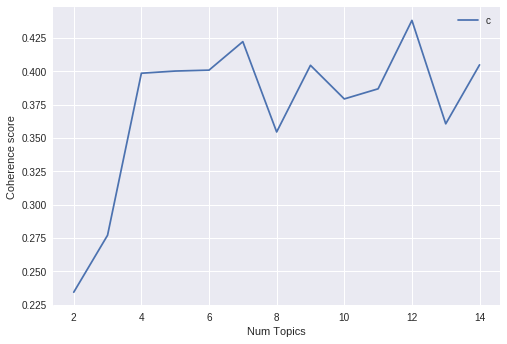

In [65]:
import matplotlib.pyplot as plt

limit=15; start=2; step=1;
model_list, coherence_values = compute_coherence_values(dictionary=gensim_dict, corpus=corpus, texts=documents, start=start, limit=limit, step=step)
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [66]:
lda12 = models.LdaModel(corpus, id2word=gensim_dict, num_topics=12, iterations=5, passes=20, alpha='auto')
vis = pyLDAvis.gensim.prepare(lda12, corpus, gensim_dict)
pyLDAvis.display(vis)

Esta seria la clusterizacion en temas optima. Por lo general parece bastante correcta, con pocas burbujas solapandose. Quedan algunos temas interesantes:

- El numero 10 parece que engloba los tweets que recogieron el atentado de Londres.
- El numero 7 parece que recoge las politicas democratas de Obama, como la seguridad social y temas de cambio climatico.
- Los numeros 1 y 2 actuan un poco como los dos grandes clusters que vimos en el ejemplo anterior, el 1 para Trump y el 2 para Obama.
- El numero 3 parece incluir los chascarrillos de Trump, como Fake News, make America Great Again y palabras como 'Hillary', 'crooked' o 'Russia'

Tambien es interesante como queda la distribucion por cuadrantes, donde las burbujas gravitan hacia sus temas relacionados (1 y 3 es el mejor ejemplo).

## Tweet Generation

Para el ultimo ejemplo vamos a escoger los tweets de Trump y a tratar de implementar un modelo que genere nuevos tweets con su estilo inconfundible.

Para ello vamos a implementar un sistema de Language Modelling como el que vimos en clase, lo entrenaremos con los tweets de Trump y generaremos una serie de frases a ver que pinta tienen.

In [0]:
#Code aquí .

import spacy

nlp = spacy.load('en_core_web_sm')

In [13]:
df3 = df2.loc[df2['label'] == 'TRUMP']

df3.head(10)

,label,tweet
2894,TRUMP,My thoughts and prayers are with the families ...
2895,TRUMP,My thoughts and prayers are with the families ...
2896,TRUMP,I am heading for Canada and the G-7 for talks ...
2897,TRUMP,Congratulations to the Washington Capitals on ...
2898,TRUMP,Looking forward to straightening out unfair Tr...
2899,TRUMP,Canada charges the U.S. a 270% tariff on Dair...
2900,TRUMP,"Obama, Schumer and Pelosi did NOTHING about No..."
2901,TRUMP,Why isn’t the European Union and Canada inform...
2902,TRUMP,"Prime Minister Trudeau is being so indignant, ..."
2903,TRUMP,Please tell Prime Minister Trudeau and Preside...


In [0]:
import re

corpus2 = []
for row in df3.iterrows():
    _, info = row
    _, q = info
    q = re.sub(r'\n', '', q)
    corpus2.append(q)
    

In [0]:
ngram_type='word'
def get_vocabulary(corpus, ngram_type='word'):
  """
    :corpus: list of strings
  """
  if ngram_type == 'word':
    vocab = set([t.text for document in corpus for t in nlp(document)])
  else:
    vocab = []
    for doc in corpus:
      vocab += list(doc)
    vocab = set(vocab)
  return list(vocab)  

In [0]:
vocab = get_vocabulary(corpus2, ngram_type=ngram_type)

In [0]:
from collections import Counter, defaultdict

def get_unigrams(corpus):
  unigrams = defaultdict(int)
  for document in corpus:
    tokens = [t for t in document.split(" ")] #[t.text for t in nlp(document)]
    for token in tokens:
      unigrams[token]+=1
  return unigrams

def get_bigrams(corpus):
  bigrams = defaultdict(int)
  for document in corpus:
    tokens = [t for t in document.split(" ")]
    for ix in range(len(tokens)-1):
      bigram = " ".join(tokens[ix:ix+2])
      bigrams[bigram]+=1
  return bigrams

In [0]:
def get_counts(corpus, ngram_range=(1,3), ngram_type='word'):
  grams = defaultdict(int)
  minrange, maxrange = ngram_range
  
  for document in corpus:
    if ngram_type=='word': 
      tokens = [t.text for t in nlp(document)]
      join_type = " ".join
    elif ngram_type == 'char':
      tokens = list(document)
      join_type = "".join
    else:
      raise 'wrong ngram_type (char/word)'
    for ix in range(len(tokens)-1):
      for nrange in range(minrange, maxrange+1):
        gram = join_type(tokens[ix:ix+nrange])
        grams[gram]+=1
  return grams


In [0]:
trigrams = get_counts(corpus2, ngram_range=(3,3), ngram_type=ngram_type)
bigrams = get_counts(corpus2, ngram_range=(2,2), ngram_type=ngram_type)
unigrams = get_counts(corpus2, ngram_range=(1,1), ngram_type=ngram_type)

In [0]:
from math import log, exp, log2

def compute_probs_laplace(counts, previous_counts, ngram_range, ngram_type):
  probs = {}
  v = len(counts)
  for c in counts.keys():
    for pc in previous_counts.keys():
      k = " ".join(c.split(" ")[:ngram_range]) if ngram_type=='word' else "".join(list(c)[:ngram_range])
      if k == pc:
        probs[c]=(counts[c]+1)/(previous_counts[pc]+v)
  
  probs['<UNK>'] =(0+1)/(previous_counts[pc]+v)
  return probs

def compute_sequence_log_prob(sequence, ngrams, ngram_range, e=0.000000, ngram_type='word'):
  probs = []
  if ngram_type=='word': 
    doc = [t.text for t in nlp(sequence)]
    join_type = " ".join
  elif ngram_type == 'char':
    doc = list(sequence)
    join_type = "".join
  else:
    raise 'wrong ngram_type (char/word)'
    
    
  for ix in range(len(doc)-ngram_range+1):
    ngram = join_type(doc[ix:ix+ngram_range])
    if ngram in ngrams:
      probs.append(ngrams[ngram])
    else:
      probs.append(ngrams['<UNK>'])
  logprob = sum([log2(p) for p in probs])
  return logprob, pow(2,logprob), len(doc)

In [38]:
probs = compute_probs_laplace(trigrams, bigrams, 2, ngram_type)
list(probs.items())[:5]

[('My thoughts and', 0.0001116118141105236),
 ('thoughts and prayers', 0.0003208302528979341),
 ('and prayers are', 0.00022317381055333158),
 ('prayers are with', 0.00026504477861786124),
 ('are with the', 0.00018130343221343598)]

In [0]:
from random import choice
def compute_next(bigram, probs, ngram_range=2, ngram_type='word'):
  max_prob = 0
  candidates = []
  for key in probs.keys(): # argmax
    k = " ".join(key.split(' ')[:ngram_range]) if ngram_type=='word' else key[:ngram_range]
    if bigram == k:
      #print('key: "{}" -- {}'.format(key, probs[key]))
      if probs[key]>max_prob:
        max_prob = probs[key]
        candidates = [key]
      elif probs[key]==max_prob:
        candidates.append(key)
  if len(candidates)>0:
    candidate = choice(candidates)
    candidate = " "+" ".join(candidate.split(' ')[ngram_range:]) if ngram_type=='word' else candidate[ngram_range:]
    return (candidate, max_prob)
  else:
    return False
      
  

In [49]:
for _ in range(5):
    text = "Make America" #
    prob = 1
    for i in range(50):
      bigram = text[-2:] if ngram_type=='char' else " ".join(text.split(' ')[-2:])
      # print('bigram:', bigram)
      next_p=compute_next(bigram, probs, ngram_type=ngram_type)
      # print('chosen: ', next_p)
      if next_p:
        text+=next_p[0]
      else:
        break
    print('Sample text: ',text)

Sample text:  Make America Great Again ! 
Sample text:  Make America Great Again ! 
Sample text:  Make America Great Again ! 
Sample text:  Make America Great Again ! 
Sample text:  Make America Great Again ! 


El algoritmo ha sido capaz de generar la frase por excelencia de Trump.

Al final no he podido jugar mucho con las cosas que se pedían, lo que es una pena porque la práctica daba bastante juego y todo lo que hemos visto en clase ha sido muy interesante. Ha sido una semana complicadilla y he tenido el tiempo limitado por lo que doy por bueno lo conseguido.